# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [88]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [89]:
file_path = "data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv"

In [90]:
import pandas as pd
import numpy as np

In [91]:
#df = pd.read_csv(file_path, parse_dates=["Date"], index_col=["Date", "ID"])
raw_df = pd.read_csv(file_path, parse_dates=["Date"])
raw_df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [92]:
leap_year = raw_df[(raw_df["Date"].dt.month == 2) & (raw_df["Date"].dt.day == 29)]
mask = (raw_df["Date"].dt.month == 2) & (raw_df["Date"].dt.day == 29)
leap_year.head()

,ID,Date,Element,Data_Value
18712,USC00205563,2012-02-29,TMAX,39
18716,USC00200842,2012-02-29,TMIN,-56
18729,USC00205563,2012-02-29,TMIN,-6
18730,USC00200842,2012-02-29,TMAX,61
18812,USC00208080,2012-02-29,TMIN,-44


In [93]:
leap_years = leap_year.Date.dt.year.unique()
leap_years

array([2012, 2008])

In [94]:
len(raw_df)

165085

In [95]:
raw_df = raw_df[~mask]
len(raw_df)

165002

In [96]:
#raw_df['Month-Day'] = raw_df['Date'].apply(lambda x: x.strftime('%b-%d'))

In [97]:
pvt_df = raw_df.pivot_table(values="Data_Value", index=["Date","ID"], columns=["Element"])
pvt_df = pvt_df.interpolate().fillna(method="bfill", axis=0).fillna(method="ffill", axis=0)
pvt_df.head()

Element                  TMAX  TMIN
Date       ID                      
2005-01-01 USC00200032   67.0 -28.0
           USC00200228  150.0 -39.0
           USC00200230  122.0 -39.0
           USC00200842  144.0 -22.0
           USC00201502  147.0 -39.0

In [98]:
df = pvt_df.reset_index(level=1)
df.TMAX = df.TMAX / 10
df.TMIN = df.TMIN / 10
df.head()

Element,ID,TMAX,TMIN
Date,,,
2005-01-01,USC00200032,6.7,-2.8
2005-01-01,USC00200228,15.0,-3.9
2005-01-01,USC00200230,12.2,-3.9
2005-01-01,USC00200842,14.4,-2.2
2005-01-01,USC00201502,14.7,-3.9


In [99]:
df['Month'] = df.index.month
df['Day'] = df.index.day
df.head()

Element,ID,TMAX,TMIN,Month,Day
Date,,,,,
2005-01-01,USC00200032,6.7,-2.8,1,1
2005-01-01,USC00200228,15.0,-3.9,1,1
2005-01-01,USC00200230,12.2,-3.9,1,1
2005-01-01,USC00200842,14.4,-2.2,1,1
2005-01-01,USC00201502,14.7,-3.9,1,1


In [100]:
df = df.sort_index()
df.tail()

Element,ID,TMAX,TMIN,Month,Day
Date,,,,,
2015-12-31,USC00208972,-0.6,-2.2,12,31
2015-12-31,USW00004848,0.6,-1.0,12,31
2015-12-31,USW00014833,-1.0,-2.1,12,31
2015-12-31,USW00014853,1.7,0.0,12,31
2015-12-31,USW00094889,-0.5,-2.1,12,31


In [101]:
# Splitting df to two DataFrames 2005-2014 and 2015
df05_14 = df["2005-01-01":"2014-12-31"]
df15 = df["2015-01-01":]

In [196]:
# Reducing 2005-2014 data to 1 year
df_grp = df05_14.groupby(["Month","Day"]).agg({"TMAX":"max","TMIN":"min"})
df_grp.head()

TMAX  TMIN
Month Day            
1     1    15.6 -16.0
      2    13.9 -26.7
      3    13.3 -26.7
      4    10.6 -26.1
      5    12.8 -15.0

In [197]:
# Reducing 2015 data to 1 year
df_grp2 = df15.groupby(["Month","Day"]).agg({"Max15":"max","Min15":"min"})
df_grp2.head()

Max15  Min15
Month Day              
1     1      1.1  -13.3
      2      3.9  -12.2
      3      3.9   -6.7
      4      4.4   -8.8
      5      2.8  -15.5

In [198]:
df_grp = df_grp.reset_index()
df_grp.head()

,Month,Day,TMAX,TMIN
0,1,1,15.6,-16.0
1,1,2,13.9,-26.7
2,1,3,13.3,-26.7
3,1,4,10.6,-26.1
4,1,5,12.8,-15.0


In [199]:
df_grp2 = df_grp2.reset_index()
df_grp2.head()

,Month,Day,Max15,Min15
0,1,1,1.1,-13.3
1,1,2,3.9,-12.2
2,1,3,3.9,-6.7
3,1,4,4.4,-8.8
4,1,5,2.8,-15.5


In [200]:
df_grp["Month"] = df_grp["Month"].astype(str)
df_grp["Day"] = df_grp["Day"].astype(str)

In [201]:
df_grp["Month-Day"] = "2015"+"-"+df_grp["Month"] + "-" + df_grp["Day"]
df_grp = df_grp.drop(["Month","Day"], axis=1)
df_grp.head()

,TMAX,TMIN,Month-Day
0,15.6,-16.0,2015-1-1
1,13.9,-26.7,2015-1-2
2,13.3,-26.7,2015-1-3
3,10.6,-26.1,2015-1-4
4,12.8,-15.0,2015-1-5


In [202]:
df_grp2["Month"] = df_grp2["Month"].astype(str)
df_grp2["Day"] = df_grp2["Day"].astype(str)

In [203]:
df_grp2["Month-Day"] = "2015"+"-"+df_grp2["Month"] + "-" + df_grp2["Day"]
df_grp2 = df_grp2.drop(["Month","Day"], axis=1)
df_grp2.head()

,Max15,Min15,Month-Day
0,1.1,-13.3,2015-1-1
1,3.9,-12.2,2015-1-2
2,3.9,-6.7,2015-1-3
3,4.4,-8.8,2015-1-4
4,2.8,-15.5,2015-1-5


In [204]:
df_grp["Month-Day"] = pd.to_datetime(df_grp["Month-Day"], format='%Y-%m-%d', errors='ignore')
df_grp.head()

,TMAX,TMIN,Month-Day
0,15.6,-16.0,2015-01-01
1,13.9,-26.7,2015-01-02
2,13.3,-26.7,2015-01-03
3,10.6,-26.1,2015-01-04
4,12.8,-15.0,2015-01-05


In [205]:
df_grp2["Month-Day"] = pd.to_datetime(df_grp2["Month-Day"], format='%Y-%m-%d', errors='ignore')
df_grp2.head()

,Max15,Min15,Month-Day
0,1.1,-13.3,2015-01-01
1,3.9,-12.2,2015-01-02
2,3.9,-6.7,2015-01-03
3,4.4,-8.8,2015-01-04
4,2.8,-15.5,2015-01-05


In [215]:
df_final = pd.concat([df_grp, df_grp2[["Max15","Min15"]]], axis=1)
df_final.head()

,TMAX,TMIN,Month-Day,Max15,Min15
0,15.6,-16.0,2015-01-01,1.1,-13.3
1,13.9,-26.7,2015-01-02,3.9,-12.2
2,13.3,-26.7,2015-01-03,3.9,-6.7
3,10.6,-26.1,2015-01-04,4.4,-8.8
4,12.8,-15.0,2015-01-05,2.8,-15.5


In [216]:
df_final = df_final.set_index("Month-Day")
df_final.head()

,TMAX,TMIN,Max15,Min15
Month-Day,,,,
2015-01-01,15.6,-16.0,1.1,-13.3
2015-01-02,13.9,-26.7,3.9,-12.2
2015-01-03,13.3,-26.7,3.9,-6.7
2015-01-04,10.6,-26.1,4.4,-8.8
2015-01-05,12.8,-15.0,2.8,-15.5


In [217]:
#record_temp_list = [(day1,value1),(day1,value2), (day2,value3)]
record_temp = []
for idx, row in df_final.iterrows():
    if row["Max15"] > row["TMAX"]:
        record_temp.append((idx, row["Max15"]))
        
    if row["Min15"] < row["TMIN"]:
        record_temp.append((idx, row["Min15"]))

In [218]:
x, y = zip(*record_temp)

In [224]:
%matplotlib notebook
import matplotlib.dates as mdates

<IPython.core.display.Javascript object>


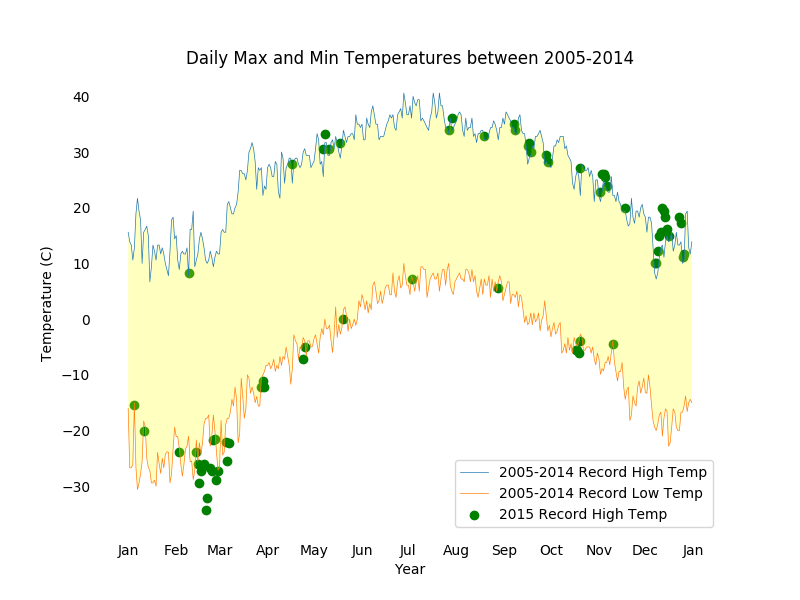

In [227]:
plt.figure(figsize=(8,6))
plt.plot(df_final.index, df_final.TMAX, label='2005-2014 Record High Temp', linewidth=0.5)
plt.plot(df_final.index, df_final.TMIN, label='2005-2014 Record Low Temp', linewidth=0.5)
plt.scatter(x, y, c="green", label='2015 Record High Temp')
#plt.scatter(df_2015.index, df_2015.TMIN, c="yellow", label='2015 Record Low Temp')
# get the current axes
ax = plt.gca()
# Set axis properties [xmin, xmax, ymin, ymax]
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
# add a label to the x axis
plt.xlabel('Year')
# add a label to the y axis
plt.ylabel('Temperature (C)')
# add a title
plt.title('Daily Max and Min Temperatures between 2005-2014')
#plt.legend(loc='bottom center', bbox_to_anchor=(0.5, 1.05),ncol=4, fancybox=True, shadow=True)
plt.legend()
# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.fill_between(df_final.index, df_final.TMIN, df_final.TMAX, facecolor='yellow', alpha=0.25)
ax.xaxis.set_major_locator(locator)
# Specify formatter
ax.xaxis.set_major_formatter(fmt)
#plt.savefig("daily max and min temp.png")
plt.show()